In [1]:
import pandas,numpy
import seaborn , matplotlib
%matplotlib inline
import json

In [2]:
import COVID19Py

In [3]:
covid = COVID19Py.COVID19()

In [4]:
data = covid.getAll(timelines=True)

In [5]:
covid.getLatest()

{'confirmed': 1771514, 'deaths': 108503, 'recovered': 0}

In [6]:
data.keys()

dict_keys(['latest', 'locations'])

In [7]:
data['locations'][1].keys()

dict_keys(['id', 'country', 'country_code', 'country_population', 'province', 'last_updated', 'coordinates', 'latest', 'timelines'])

In [8]:
data['locations'][1]['country']

'Albania'

In [9]:
data['locations'][1]['country_code']

'AL'

In [10]:
data['locations'][1]['last_updated']

'2020-04-12T14:00:37.372928Z'

In [11]:
data['locations'][1]['timelines'].keys()

dict_keys(['confirmed', 'deaths', 'recovered'])

In [12]:
data['locations'][1]['timelines']['confirmed'].keys()

dict_keys(['latest', 'timeline'])

In [13]:
len(data['locations'][1]['timelines']['deaths']['timeline'])

81

In [14]:
Confirmed_Cases = list(data['locations'][1]['timelines']['confirmed']['timeline'].values())
Deaths = list(data['locations'][1]['timelines']['deaths']['timeline'].values())
TimeLines = list(data['locations'][1]['timelines']['deaths']['timeline'].keys())

In [15]:
Df = {'TimeLine':TimeLines ,'Cases':Confirmed_Cases , 'Deaths':Deaths}
Countrywise_test_dataframe = pandas.DataFrame(Df)
Countrywise_test_dataframe.head()



,TimeLine,Cases,Deaths
0,2020-01-22T00:00:00Z,0,0
1,2020-01-23T00:00:00Z,0,0
2,2020-01-24T00:00:00Z,0,0
3,2020-01-25T00:00:00Z,0,0
4,2020-01-26T00:00:00Z,0,0


In [16]:
Countrywise_test_dataframe.to_csv()

',TimeLine,Cases,Deaths\n0,2020-01-22T00:00:00Z,0,0\n1,2020-01-23T00:00:00Z,0,0\n2,2020-01-24T00:00:00Z,0,0\n3,2020-01-25T00:00:00Z,0,0\n4,2020-01-26T00:00:00Z,0,0\n5,2020-01-27T00:00:00Z,0,0\n6,2020-01-28T00:00:00Z,0,0\n7,2020-01-29T00:00:00Z,0,0\n8,2020-01-30T00:00:00Z,0,0\n9,2020-01-31T00:00:00Z,0,0\n10,2020-02-01T00:00:00Z,0,0\n11,2020-02-02T00:00:00Z,0,0\n12,2020-02-03T00:00:00Z,0,0\n13,2020-02-04T00:00:00Z,0,0\n14,2020-02-05T00:00:00Z,0,0\n15,2020-02-06T00:00:00Z,0,0\n16,2020-02-07T00:00:00Z,0,0\n17,2020-02-08T00:00:00Z,0,0\n18,2020-02-09T00:00:00Z,0,0\n19,2020-02-10T00:00:00Z,0,0\n20,2020-02-11T00:00:00Z,0,0\n21,2020-02-12T00:00:00Z,0,0\n22,2020-02-13T00:00:00Z,0,0\n23,2020-02-14T00:00:00Z,0,0\n24,2020-02-15T00:00:00Z,0,0\n25,2020-02-16T00:00:00Z,0,0\n26,2020-02-17T00:00:00Z,0,0\n27,2020-02-18T00:00:00Z,0,0\n28,2020-02-19T00:00:00Z,0,0\n29,2020-02-20T00:00:00Z,0,0\n30,2020-02-21T00:00:00Z,0,0\n31,2020-02-22T00:00:00Z,0,0\n32,2020-02-23T00:00:00Z,0,0\n33,2020-02-24T00:00:00Z,0,0\

In [17]:
import subprocess
subprocess.call("mkdir 'Countries_TimeLine_Data'" , shell=True )
for item in data['locations']:
    Country_name = item['country']
    if item['province']=='':
        #print(Country_name)
        pass
    else:
        #print(Country_name , item['province'])
        pass
    

In [18]:
import subprocess
Confirmed_Cases1 = []
Deaths1 = []
current_Country = {}
TotalCountry = False

subprocess.call("mkdir 'Countries_TimeLine_Data'" , shell=True )
for item in data['locations']:
    Country_name = item['country']
    if item['province']=='':
        #print(Country_name)
        Confirmed_Cases = list(item['timelines']['confirmed']['timeline'].values())
        Deaths = list(item['timelines']['deaths']['timeline'].values())
        TimeLines = list(item['timelines']['deaths']['timeline'].keys())
        
        Df = {'TimeLine':TimeLines ,'Cases':Confirmed_Cases , 'Deaths':Deaths}
        Countrywise_test_dataframe = pandas.DataFrame(Df)
        if TotalCountry ==False:
            TotalCountryDataFrame = pandas.DataFrame(Df)
            TotalCountry =True
            Confirmed_Cases2 = Confirmed_Cases
            Deaths2 = Deaths
            Countrywise_test_dataframe.to_csv('CountryTotal.csv',index=False)
            
        else:
            Confirmed_Cases2 = [Confirmed_Cases[j]+Confirmed_Cases2[j] for j in range(len(Confirmed_Cases))]
            Deaths2 = [Deaths[j]+Deaths2[j] for j in range(len(Deaths))]
            Df = {'TimeLine':TimeLines ,'Cases':Confirmed_Cases2 , 'Deaths':Deaths2}
            Countrywise_test_dataframe1 = pandas.DataFrame(Df)
            Countrywise_test_dataframe1.to_csv('CountryTotal.csv',index=False)
            
        
        Countrywise_test_dataframe.to_csv('Countries_TimeLine_Data/'+str(Country_name)+'.csv',index=False)
        
    else:
        #print(Country_name , item['province'])
        #if current_Country != Country_name:
            #current_Country = Country_name
            
            
        if Country_name in list(current_Country.keys()):
            
            Confirmed_Cases = list(item['timelines']['confirmed']['timeline'].values())
            Deaths = list(item['timelines']['deaths']['timeline'].values())
            TimeLines = list(item['timelines']['deaths']['timeline'].keys())
            if TotalCountry ==False:
                TotalCountryDataFrame = pandas.DataFrame(Df)
                TotalCountry =True
                Confirmed_Cases2 = Confirmed_Cases
                Deaths2 = Deaths
                Countrywise_test_dataframe.to_csv('CountryTotal.csv',index=False)
                Df = {'TimeLine':TimeLines ,'Cases':Confirmed_Cases , 'Deaths':Deaths}
                Countrywise_test_dataframe = pandas.DataFrame(Df)

            else:
                Confirmed_Cases2 = [Confirmed_Cases[j]+Confirmed_Cases2[j] for j in range(len(Confirmed_Cases))]
                Deaths2 = [Deaths[j]+Deaths2[j] for j in range(len(Deaths))]
                Df = {'TimeLine':TimeLines ,'Cases':Confirmed_Cases2 , 'Deaths':Deaths2}
                Countrywise_test_dataframe1 = pandas.DataFrame(Df)
                Countrywise_test_dataframe1.to_csv('CountryTotal.csv',index=False)
            
            
            Confirmed_Cases1 = current_Country[Country_name][0]
            Deaths1 = current_Country[Country_name][1]
            Confirmed_Cases = [Confirmed_Cases[j]+Confirmed_Cases1[j] for j in range(len(Confirmed_Cases))]
            Deaths = [Deaths[j]+Deaths1[j] for j in range(len(Deaths))]
            
            Confirmed_Cases1 = Confirmed_Cases
            Deaths1 = Deaths
            
            current_Country[Country_name] = [Confirmed_Cases1 , Deaths1]
            
            
            Df = {'TimeLine':TimeLines ,'Cases':Confirmed_Cases , 'Deaths':Deaths}
            Countrywise_test_dataframe = pandas.DataFrame(Df)
            
            Countrywise_test_dataframe.to_csv('Countries_TimeLine_Data/'+str(Country_name)+'.csv',index=False)
        else:
            Confirmed_Cases = list(item['timelines']['confirmed']['timeline'].values())
            Deaths = list(item['timelines']['deaths']['timeline'].values())
            TimeLines = list(item['timelines']['deaths']['timeline'].keys())
            if TotalCountry ==False:
                TotalCountryDataFrame = pandas.DataFrame(Df)
                TotalCountry =True
                Confirmed_Cases2 = Confirmed_Cases
                Deaths2 = Deaths
                Countrywise_test_dataframe.to_csv('CountryTotal.csv',index=False)
                Df = {'TimeLine':TimeLines ,'Cases':Confirmed_Cases , 'Deaths':Deaths}
                Countrywise_test_dataframe = pandas.DataFrame(Df)

            else:
                Confirmed_Cases2 = [Confirmed_Cases[j]+Confirmed_Cases2[j] for j in range(len(Confirmed_Cases))]
                Deaths2 = [Deaths[j]+Deaths2[j] for j in range(len(Deaths))]
                Df = {'TimeLine':TimeLines ,'Cases':Confirmed_Cases2 , 'Deaths':Deaths2}
                Countrywise_test_dataframe1 = pandas.DataFrame(Df)
                Countrywise_test_dataframe1.to_csv('CountryTotal.csv',index=False)
                
            Confirmed_Cases1 = Confirmed_Cases
            Deaths1 = Deaths
            current_Country[Country_name] = [Confirmed_Cases1 , Deaths1]
            
            Df = {'TimeLine':TimeLines ,'Cases':Confirmed_Cases , 'Deaths':Deaths}
            Countrywise_test_dataframe = pandas.DataFrame(Df)
            Countrywise_test_dataframe.to_csv('Countries_TimeLine_Data/'+str(Country_name)+'.csv',index=False)
print(list(current_Country.keys()))
    

['Australia', 'Canada', 'China', 'Denmark', 'France', 'Netherlands', 'United Kingdom']


In [19]:
import subprocess , os,sys
temp_file = open("temp.json",'w')

In [20]:
subprocess.call("curl --location --request GET 'https://api.covid19api.com/summary'" , shell=True , stdout = temp_file)

0

In [21]:
with open("temp.json",'r') as file:
    output = json.load(file)

In [22]:
len(output['Countries'])

248

In [23]:
numpy.array(list(output['Countries'][100].keys()))

array(['Country', 'CountryCode', 'Slug', 'NewConfirmed', 'TotalConfirmed',
       'NewDeaths', 'TotalDeaths', 'NewRecovered', 'TotalRecovered',
       'Date'], dtype='<U14')

In [24]:
Data = pandas.DataFrame([list(output['Countries'][i].values()) for i in range(len(output['Countries'])) ] ,columns=list(output['Countries'][100].keys()))

In [13]:
Data.head()

,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date
0,ALA Aland Islands,AX,ala-aland-islands,0,0,0,0,0,0,2020-04-09T18:19:18Z
1,Afghanistan,AF,afghanistan,21,444,0,14,11,29,2020-04-09T18:19:18Z
2,Albania,AL,albania,17,400,0,22,23,154,2020-04-09T18:19:18Z
3,Algeria,DZ,algeria,104,1572,12,205,124,237,2020-04-09T18:19:18Z
4,American Samoa,AS,american-samoa,0,0,0,0,0,0,2020-04-09T18:19:18Z


In [14]:
Data.head()

,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date
0,ALA Aland Islands,AX,ala-aland-islands,0,0,0,0,0,0,2020-04-09T18:19:18Z
1,Afghanistan,AF,afghanistan,21,444,0,14,11,29,2020-04-09T18:19:18Z
2,Albania,AL,albania,17,400,0,22,23,154,2020-04-09T18:19:18Z
3,Algeria,DZ,algeria,104,1572,12,205,124,237,2020-04-09T18:19:18Z
4,American Samoa,AS,american-samoa,0,0,0,0,0,0,2020-04-09T18:19:18Z


In [15]:
Data = Data.drop('Slug',axis=1)

In [16]:
Data.head()

,Country,CountryCode,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date
0,ALA Aland Islands,AX,0,0,0,0,0,0,2020-04-09T18:19:18Z
1,Afghanistan,AF,21,444,0,14,11,29,2020-04-09T18:19:18Z
2,Albania,AL,17,400,0,22,23,154,2020-04-09T18:19:18Z
3,Algeria,DZ,104,1572,12,205,124,237,2020-04-09T18:19:18Z
4,American Samoa,AS,0,0,0,0,0,0,2020-04-09T18:19:18Z


In [17]:
Data = Data.sort_values('TotalConfirmed' , axis=0,ascending=False)

In [18]:
Data.head(10)

,Country,CountryCode,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date
236,United States of America,US,32826,429047,1973,14694,1796,23559,2020-04-09T08:36:30Z
208,Spain,ES,6278,148220,747,14792,4813,48021,2020-04-09T08:36:30Z
108,Italy,IT,3836,139422,542,17669,2099,26491,2020-04-09T08:36:30Z
74,France,FR,3894,113959,544,10887,1929,21452,2020-04-09T08:36:30Z
81,Germany,DE,5633,113296,333,2349,10219,46300,2020-04-09T08:36:30Z
45,China,CN,91,82809,2,3337,157,77567,2020-04-09T08:36:30Z
103,"Iran, Islamic Republic of",IR,1997,64586,121,3993,2773,29812,2020-04-09T08:36:30Z
235,United Kingdom,GB,5525,61474,940,7111,20,345,2020-04-09T08:36:30Z
227,Turkey,TR,4117,38226,87,812,264,1846,2020-04-09T08:36:30Z
21,Belgium,BE,1209,23403,205,2240,524,4681,2020-04-09T08:36:30Z


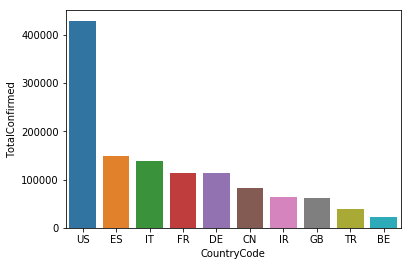

In [19]:
seaborn.barplot(x='CountryCode' , y='TotalConfirmed' , data=Data.head(10))

In [20]:
Cases = list(Data.iloc[1][[3,5,7]])

In [21]:
Cases_key = ['TotalConfirmed' , 'TotalDeaths' , 'TotalRecoved']

In [22]:
import subprocess , os,sys
countries = open("Countries.json",'w')

In [23]:
subprocess.call("curl --location --request GET 'https://api.covid19api.com/countries'" , shell=True , stdout = countries)

0

In [24]:
with open("Countries.json",'r') as file:
    output_countries = json.load(file)

In [25]:
output_countries[0].keys()
#list(output_countries[0].values())
#len(output_countries)

dict_keys(['Country', 'Slug', 'ISO2'])

In [132]:
Countries_DataFrame = pandas.DataFrame([list(output_countries[i].values()) for i in range(len(output_countries)) ] ,columns=list(output_countries[100].keys()))

In [102]:
for country in Countries_DataFrame['Slug']:
    pass
print(len(Countries_DataFrame['Slug']))
URL = 'https://api.covid19api.com/live/country/'+str('india')+'/status/confirmed'
print(URL)

248
https://api.covid19api.com/live/country/india/status/confirmed


In [124]:
def Country_Data_Load(value):
    countries_name = open("Country Live Data/"+str(value[0])+".json",'w')
    
    URL = 'https://api.covid19api.com/live/country/'+str(value[1])+'/status/confirmed/date/2020-01-01T00:00:00Z'
    subprocess.call("curl --location --request GET "+str(URL)+ "" , shell=True , stdout = countries_name)
    
    

In [96]:
#URL = 'https://api.covid19api.com/live/country/'+str('india')+'/status/confirmed'
#print(URL)
#countries_india = open("Countries.json",'w')
#subprocess.call("curl --location --request GET "+str(URL)+ "" , shell=True , stdout = countries_india)

https://api.covid19api.com/live/country/india/status/confirmed


0

In [20]:
import subprocess , os,sys
total= open("Total.json",'w')

In [21]:
subprocess.call("curl --location --request GET 'https://thevirustracker.com/free-api?global=stats'" , shell=True , stdout = total)

0

In [22]:
with open("Total.json",'r') as file:
    output_Total = json.load(file)


In [23]:
output_Total

{'results': [{'total_cases': 1797518,
   'total_recovered': 412129,
   'total_unresolved': 1268683,
   'total_deaths': 110075,
   'total_new_cases_today': 17775,
   'total_new_deaths_today': 1296,
   'total_active_cases': 1275314,
   'total_serious_cases': 50525,
   'total_affected_countries': 210,
   'source': {'url': 'https://thevirustracker.com/'}}],
 'stat': 'ok'}

In [24]:
V = list(output_Total['results'][0].values())
V=V[:-1]
K = list(output_Total['results'][0].keys())
K = K[:-1]
K

['total_cases',
 'total_recovered',
 'total_unresolved',
 'total_deaths',
 'total_new_cases_today',
 'total_new_deaths_today',
 'total_active_cases',
 'total_serious_cases',
 'total_affected_countries']

In [25]:
Total_Data = pandas.DataFrame([V] , columns=K)

In [26]:
Total_Data

,total_cases,total_recovered,total_unresolved,total_deaths,total_new_cases_today,total_new_deaths_today,total_active_cases,total_serious_cases,total_affected_countries
0,1797518,412129,1268683,110075,17775,1296,1275314,50525,210


In [27]:
Full_Timeline= open("timeline.json",'w')

In [28]:
subprocess.call("curl --location --request GET 'https://thevirustracker.com/timeline/map-data.json'" , shell=True , stdout = Full_Timeline)

0

In [29]:
with open("timeline.json",'r') as file:
    output_Timeline = json.load(file)

In [30]:
countryCode = []

for data in output_Timeline['data']:
    countryCode.append(data['countrycode'])
#output_Timeline['data']

In [31]:
len(set(countryCode))
output_Timeline['data'][0].values()

dict_values(['CN', '1/22/20', '548', '17', '28'])

In [32]:
countryValues = []

for data in output_Timeline['data']:
    countryValues.append(list(data.values()))

In [33]:
Timeline_Dataframe = pandas.DataFrame(countryValues , columns=list(output_Timeline['data'][0].keys()))

In [34]:
Timeline_Dataframe.tail()

,countrycode,date,cases,deaths,recovered
7232,BI,4/06/20,3,0,0
7233,MW,4/06/20,5,0,0
7234,SS,4/06/20,1,0,0
7235,EH,4/06/20,4,0,0
7236,ST,4/06/20,4,0,0


In [35]:
A = Timeline_Dataframe.groupby(by='countrycode')

In [36]:
A.get_group('US')

,countrycode,date,cases,deaths,recovered
5,US,1/22/20,1,0,0
12,US,1/23/20,1,0,0
21,US,1/24/20,2,0,0
32,US,1/25/20,2,0,0
45,US,1/26/20,5,0,0
61,US,1/27/20,5,0,0
77,US,1/28/20,5,0,0
95,US,1/29/20,5,0,0
115,US,1/30/20,5,0,0
139,US,1/31/20,7,0,0


In [37]:
Country_Timeline= open("country_timeline.json",'w')
subprocess.call("curl --location --request GET 'https://api.thevirustracker.com/free-api?countryTimeline=US'" , shell=True , stdout = Country_Timeline)
with open("country_timeline.json",'r') as file:
    output_Country_Timeline = json.load(file)


In [38]:
len(output_Country_Timeline)
output_Country_Timeline['timelineitems'][0]['4/08/20']

{'new_daily_cases': 32829,
 'new_daily_deaths': 1973,
 'total_cases': 429052,
 'total_recoveries': 0,
 'total_deaths': 14695}

In [39]:
Total= open("Total.json",'w')
subprocess.call("curl --location --request GET 'https://corona.lmao.ninja/all'" , shell=True , stdout = Total)
with open("Total.json",'r') as file:
    output_Total = json.load(file)


In [40]:
output_Total

{'updated': 1586700746542,
 'cases': 1797512,
 'todayCases': 17769,
 'deaths': 110075,
 'todayDeaths': 1296,
 'recovered': 412129,
 'active': 1275308,
 'critical': 50525,
 'casesPerOneMillion': 231,
 'deathsPerOneMillion': 14,
 'tests': 14025249,
 'testsPerOneMillion': 1802.4,
 'affectedCountries': 212}

In [41]:
Total_DataFrame = pandas.DataFrame([list(output_Total.values())] , columns=list(output_Total.keys()))

In [42]:
Total_DataFrame

,updated,cases,todayCases,deaths,todayDeaths,recovered,active,critical,casesPerOneMillion,deathsPerOneMillion,tests,testsPerOneMillion,affectedCountries
0,1586700746542,1797512,17769,110075,1296,412129,1275308,50525,231,14,14025249,1802.4,212


In [45]:
import matplotlib.pyplot as plt
import pylab

Figure(750x375)
Figure(750x375)


<Figure size 500x250 with 0 Axes>

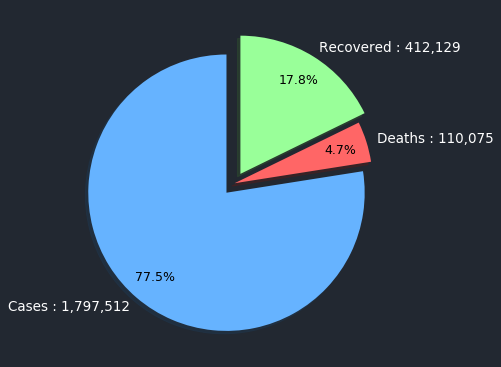

In [96]:
D = []
D.append(list(Total_DataFrame['cases'])[0])
D.append(list(Total_DataFrame['deaths'])[0])
D.append(list(Total_DataFrame['recovered'])[0])
"""
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format
"""

Labels = ['Cases'+' : '+str(f'{D[0]:,}') , 'Deaths'+' : '+str(f'{D[1]:,}') , 'Recovered'+' : '+str(f'{D[2]:,}')]
colors = ['#66b3ff','#ff6666','#99ff99']
explode = (0.09, 0, 0.08)
plt.figure(dpi=50)
fig1=plt.figure(dpi=75)
#fig1 = plt.subplots()
fig1.set_facecolor('#222831')

F=pylab.gcf()
#F.get( (500, 320) )
print(F)
#fig1.set_size_inches(530,320)
#plt.figure(figsize=(530,320))
patches, texts, autotexts = plt.pie(D,explode = explode,pctdistance=0.8 ,labeldistance=1.08,colors = colors, autopct = '%1.1f%%',shadow=True,labels=Labels, startangle=90)

for text in texts:
    text.set_color('white')
    text.set_fontsize(13)
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(12)

F=pylab.gcf()
print(F)
#ax1.axis('equal')
plt.tight_layout()
fig1.savefig('world_pie.png' , facecolor ='#222831' )
#plt.style.use('ggplot')
#fig1.set_facecolor('#222831')


#fig1.savefig('world_pie.png' , facecolor ='#222831'  )
#plt.show()


In [47]:
from PIL import Image  



In [48]:

Countries= open("Countries.json",'w')
subprocess.call("curl --location --request GET 'https://corona.lmao.ninja/countries?sort=country'"  , shell=True , stdout = Countries)
with open("Countries.json",'r') as file:
    output_Countries = json.load(file)

In [49]:
"""
Date_List = []
count = 0
for item in output_Historical:
    Date_List += list(item['timeline']['cases'].keys())
    count+=1
print(count)
"""
output_Countries[0]
Countries_DataFrame1 = pandas.DataFrame([list(output_Countries[i].values()) for i in range(len(output_Countries)) ] ,columns=list(output_Countries[0].keys()))

In [50]:
Countries_DataFrame1 = Countries_DataFrame1.drop('countryInfo',axis = 1)

In [51]:
Countries_DataFrame2 = pandas.DataFrame([list(output_Countries[i]['countryInfo'].values()) for i in range(len(output_Countries)) ] ,columns=list(output_Countries[0]['countryInfo'].keys()))

In [52]:
Countries_DataFrame2.head(1)

,_id,iso2,iso3,lat,long,flag
0,716.0,ZW,ZWE,-20.0,30.0,https://raw.githubusercontent.com/NovelCOVID/A...


In [53]:
A = list(Countries_DataFrame2['flag'])
B = list(Countries_DataFrame2['long'])
C = list(Countries_DataFrame2['lat'])
D = list(Countries_DataFrame2['iso3'])
E = list(Countries_DataFrame2['iso2'])
F = list(Countries_DataFrame2['_id'])

Countries_DataFrame1['flag'] = A
Countries_DataFrame1['long'] = B
Countries_DataFrame1['lat'] = C
Countries_DataFrame1['iso3'] = D
Countries_DataFrame1['iso2'] = E
Countries_DataFrame1['_id'] = F

In [54]:
Countries_DataFrame1.head()

,updated,country,cases,todayCases,deaths,todayDeaths,recovered,active,critical,casesPerOneMillion,deathsPerOneMillion,tests,testsPerOneMillion,flag,long,lat,iso3,iso2,_id
0,1586700746578,Zimbabwe,14,0,3,0,0,11,0,0,0,547,37,https://raw.githubusercontent.com/NovelCOVID/A...,30.0,-20.0,ZWE,ZW,716.0
1,1586700746574,Zambia,43,3,2,0,30,11,1,2,0,1239,67,https://raw.githubusercontent.com/NovelCOVID/A...,30.0,-15.0,ZMB,ZM,894.0
2,1586700746585,Yemen,1,0,0,0,0,1,0,0,0,0,0,https://raw.githubusercontent.com/NovelCOVID/A...,48.0,15.0,YEM,YE,887.0
3,1586700746582,Western Sahara,6,0,0,0,0,6,0,10,0,0,0,https://raw.githubusercontent.com/NovelCOVID/A...,-13.0,24.5,ESH,EH,732.0
4,1586700746568,Vietnam,260,2,0,0,144,116,8,3,0,121821,1252,https://raw.githubusercontent.com/NovelCOVID/A...,106.0,16.0,VNM,VN,704.0


In [55]:
Countries_DataFrame = Countries_DataFrame1.sort_values('cases' , ascending=False)

In [56]:
Countries_DataFrame.head()

,updated,country,cases,todayCases,deaths,todayDeaths,recovered,active,critical,casesPerOneMillion,deathsPerOneMillion,tests,testsPerOneMillion,flag,long,lat,iso3,iso2,_id
10,1586700746543,USA,534494,1615,20637,60,30548,483309,11471,1615,62,2699417,8155,https://raw.githubusercontent.com/NovelCOVID/A...,-97.0000,38.0000,USA,US,840.0
30,1586700746543,Spain,166019,2992,16972,366,62391,86656,7371,3551,363,355000,7593,https://raw.githubusercontent.com/NovelCOVID/A...,-4.0000,40.0000,ESP,ES,724.0
112,1586700746543,Italy,152271,0,19468,0,32534,100269,3381,2518,322,963473,15935,https://raw.githubusercontent.com/NovelCOVID/A...,12.8333,42.8333,ITA,IT,380.0
142,1586700746543,France,129654,0,13832,0,26391,89431,6883,1986,212,333807,5114,https://raw.githubusercontent.com/NovelCOVID/A...,2.0000,46.0000,FRA,FR,250.0
136,1586700746544,Germany,125452,0,2871,0,57400,65181,4895,1497,34,1317887,15730,https://raw.githubusercontent.com/NovelCOVID/A...,9.0000,51.0000,DEU,DE,276.0


In [57]:
Total_Timeline = pandas.read_csv('CountryTotal.csv')

In [58]:
A = list(Total_Timeline['Cases'])
print(len(A))
B = [A[item] for item in range(0,len(A) ,7)]
if len(A)%7 != 0:
    B.append(A[-1])
B

W = ['W'+str(item) for item in range(0 , len(B))]

#plt.style.available

81


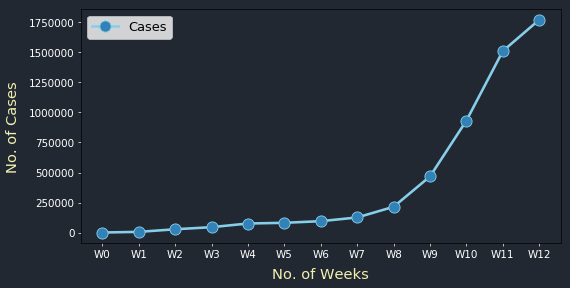

In [91]:
#plt.style.use('seaborn-pastel')
import matplotlib.pylab as pylab
params = {
         'legend.fontsize': 15,
        'figure.figsize': (10, 5),
         'xtick.labelsize':12,
         'ytick.labelsize':12}
pylab.rcParams.update(params)
fig = plt.figure(dpi=62)
fig.set_facecolor('#222831')
ax = fig.add_subplot(111)
ax.set_facecolor('#222831')
ax.plot(W , B , marker='o' ,markersize=13,markerfacecolor='#3282b8', color='skyblue' , linewidth = 3)
#ax.spines['bottom'].set_color('#222831')
ax.set_xlabel('No. of Weeks' , labelpad=10 , fontsize = 17)
ax.set_ylabel('No. of Cases',labelpad=10 , fontsize = 17)
ax.xaxis.label.set_color('#f1f1b0')
ax.yaxis.label.set_color('#f1f1b0')
#ax.legend.color('white')

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.grid(visible = False)
plt.legend(['Cases'])
plt.savefig('CasesLine.png' , facecolor ='#222831')

In [97]:
A = list(Total_Timeline['Deaths'])
print(len(A))
B = [A[item] for item in range(0,len(A) ,7)]
if len(A)%7 != 0:
    B.append(A[-1])
B
W = ['W'+str(item) for item in range(0 , len(B))]

81


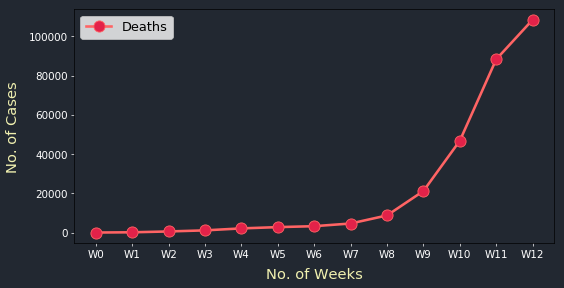

In [102]:
params = {
         'legend.fontsize': 15,
        'figure.figsize': (10, 5),
         'xtick.labelsize':12,
         'ytick.labelsize':12}
pylab.rcParams.update(params)
fig = plt.figure(dpi=62)
fig.set_facecolor('#222831')
ax = fig.add_subplot(111)
ax.set_facecolor('#222831')
ax.plot(W , B , marker='o' ,markersize=13,markerfacecolor='#e32249', color='#ff6464' , linewidth = 3)
#ax.spines['bottom'].set_color('#222831')
ax.set_xlabel('No. of Weeks' , labelpad=10 , fontsize = 17)
ax.set_ylabel('No. of Deaths',labelpad=10 , fontsize = 17)
ax.xaxis.label.set_color('#f1f1b0')
ax.yaxis.label.set_color('#f1f1b0')
#ax.legend.color('white')

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.grid(visible = False)
plt.legend(['Deaths'])
plt.savefig('DeathsLine.png' , facecolor ='#222831')

In [103]:

Countries= open("Countries.json",'w')
subprocess.call("curl --location --request GET 'https://corona.lmao.ninja/countries?sort=country'"  , shell=True , stdout = Countries)
with open("Countries.json",'r') as file:
    output_Countries = json.load(file)

In [109]:
Countries_DataFrame1 = pandas.DataFrame([list(output_Countries[i].values()) for i in range(len(output_Countries)) ] ,columns=list(output_Countries[0].keys()))

In [110]:
Countries_DataFrame1 = Countries_DataFrame1.drop('countryInfo',axis = 1)
Countries_DataFrame1.head()

,updated,country,cases,todayCases,deaths,todayDeaths,recovered,active,critical,casesPerOneMillion,deathsPerOneMillion,tests,testsPerOneMillion
0,1586718146825,Zimbabwe,14,0,3,0,0,11,0,0,0,547,37
1,1586718146821,Zambia,43,3,2,0,30,11,1,2,0,1239,67
2,1586718146831,Yemen,1,0,0,0,0,1,0,0,0,0,0
3,1586718146829,Western Sahara,6,0,0,0,0,6,0,10,0,0,0
4,1586718146815,Vietnam,260,2,0,0,144,116,8,3,0,121821,1252


In [111]:
Countries_DataFrame2 = pandas.DataFrame([list(output_Countries[i]['countryInfo'].values()) for i in range(len(output_Countries)) ] ,columns=list(output_Countries[0]['countryInfo'].keys()))

In [112]:
A = list(Countries_DataFrame2['flag'])
B = list(Countries_DataFrame2['long'])
C = list(Countries_DataFrame2['lat'])
D = list(Countries_DataFrame2['iso3'])
E = list(Countries_DataFrame2['iso2'])
F = list(Countries_DataFrame2['_id'])

Countries_DataFrame1['flag'] = A
Countries_DataFrame1['long'] = B
Countries_DataFrame1['lat'] = C
Countries_DataFrame1['iso3'] = D
Countries_DataFrame1['iso2'] = E
Countries_DataFrame1['_id'] = F

In [114]:
Countries_DataFrame1.head()

,updated,country,cases,todayCases,deaths,todayDeaths,recovered,active,critical,casesPerOneMillion,deathsPerOneMillion,tests,testsPerOneMillion,flag,long,lat,iso3,iso2,_id
0,1586718146825,Zimbabwe,14,0,3,0,0,11,0,0,0,547,37,https://raw.githubusercontent.com/NovelCOVID/A...,30.0,-20.0,ZWE,ZW,716.0
1,1586718146821,Zambia,43,3,2,0,30,11,1,2,0,1239,67,https://raw.githubusercontent.com/NovelCOVID/A...,30.0,-15.0,ZMB,ZM,894.0
2,1586718146831,Yemen,1,0,0,0,0,1,0,0,0,0,0,https://raw.githubusercontent.com/NovelCOVID/A...,48.0,15.0,YEM,YE,887.0
3,1586718146829,Western Sahara,6,0,0,0,0,6,0,10,0,0,0,https://raw.githubusercontent.com/NovelCOVID/A...,-13.0,24.5,ESH,EH,732.0
4,1586718146815,Vietnam,260,2,0,0,144,116,8,3,0,121821,1252,https://raw.githubusercontent.com/NovelCOVID/A...,106.0,16.0,VNM,VN,704.0


In [124]:
Countries_DataFrame = Countries_DataFrame1.sort_values('cases' , ascending=False)
Countries_DataFrame.to_csv('Countries_DataFrame.csv' , index= False)